In [553]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [148]:
images_path = "/Users/bernardozamin/Documents/T1-VisaoComputacional/data"
images = [img for img in os.listdir(images_path) if img != ".DS_Store"]
cropped_eyes = []
len(cropped_eyes)

0

### GRAYSCALE


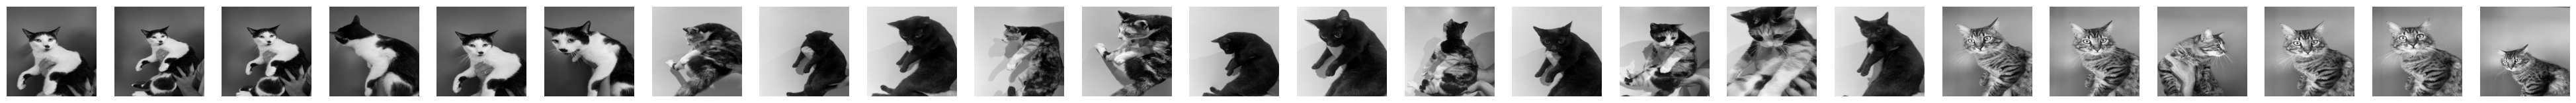

24

In [142]:
fig, axs = plt.subplots(1, len(images), figsize=(50, 50))
imgs_gray = []

def show_gray_scale(images):

    for i, image in enumerate(images):
        image_path = os.path.join(images_path, image)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img, (512, 512))
        imgs_gray.append(resized_img)
        axs[i].imshow(cv2.cvtColor(imgs_gray[i], cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
    plt.show()

show_gray_scale(images)
len(imgs_gray)

### BLUR

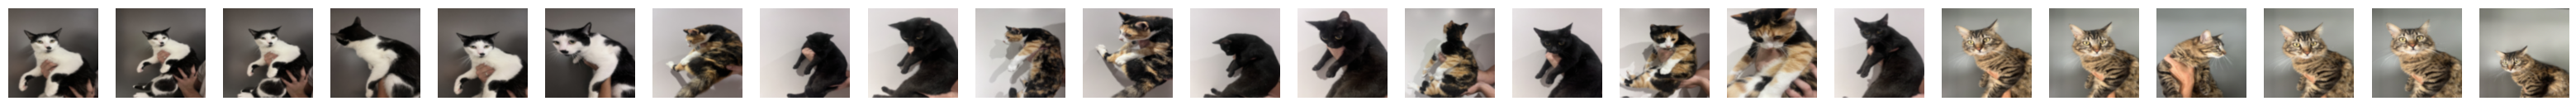

24

In [143]:
fig, axs = plt.subplots(1, len(images), figsize=(40, 40))
imgs_blur = []
def show_blur(images):
    
    for i, image in enumerate(images):
        image_path = os.path.join(images_path, image)
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (512, 512))
        blur = cv2.GaussianBlur(resized_img, (15, 15), 0)
        imgs_blur.append(blur)
        axs[i].imshow(cv2.cvtColor(imgs_blur[i], cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
    plt.show()

show_blur(images)
len(imgs_blur)

### DETECCAO DOS OLHOS 

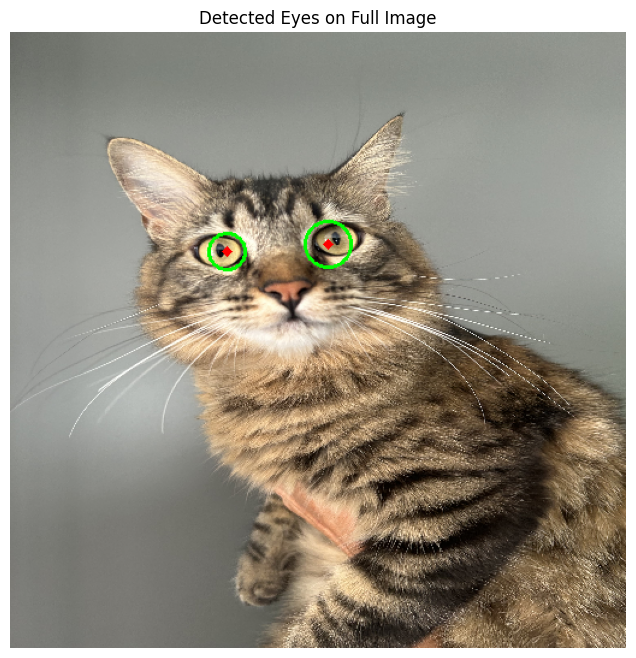

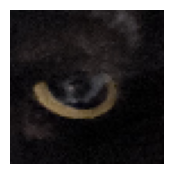

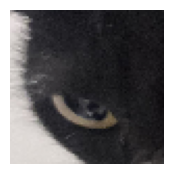

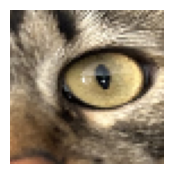

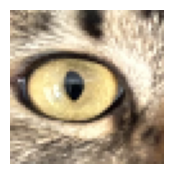

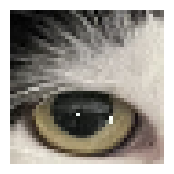

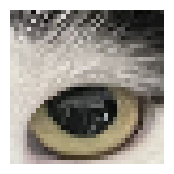

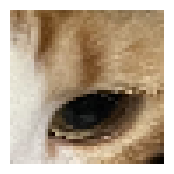

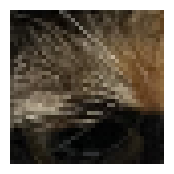

In [532]:
def detect_crop_and_plot_eyes(image_path, dp, minDist, param1, param2, minRadius, maxRadius, padding=10):  
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Imagem não encontrada.")
        return

    resized_image = cv2.resize(original_image, (512, 512))
    
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    gray_blurred = cv2.medianBlur(gray_image, 5)

    circles = cv2.HoughCircles(gray_blurred, 
                               cv2.HOUGH_GRADIENT, dp=dp, minDist=minDist,
                               param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    
    image_with_circles = resized_image.copy()

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2] + padding 


            cv2.circle(image_with_circles, (i[0], i[1]), radius, (0, 255, 0), 2)
            cv2.circle(image_with_circles, (i[0], i[1]), 2, (0, 0, 255), 3)

            x1 = max(center[0] - radius, 0)
            y1 = max(center[1] - radius, 0)
            x2 = min(center[0] + radius, resized_image.shape[1])
            y2 = min(center[1] + radius, resized_image.shape[0])

            cropped_eye = resized_image[y1:y2, x1:x2]
            # cropped_eyes.append(cropped_eye)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB))
    plt.title("Detected Eyes on Full Image")
    plt.axis('off')
    plt.show()

    for idx, cropped_eye in enumerate(cropped_eyes, start=1):
        plt.figure(figsize=(2, 2))
        plt.imshow(cv2.cvtColor(cropped_eye, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

detect_crop_and_plot_eyes('/Users/bernardozamin/Documents/T1-VisaoComputacional/data/luna2.jpg', dp=1, minDist=40, param1=100, param2=20, minRadius=10, maxRadius=19, padding=5)

### EXTRAINDO AS 5 CORES PREDOMINANTES

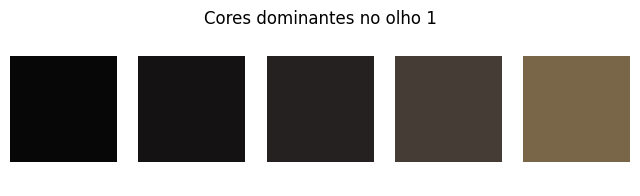

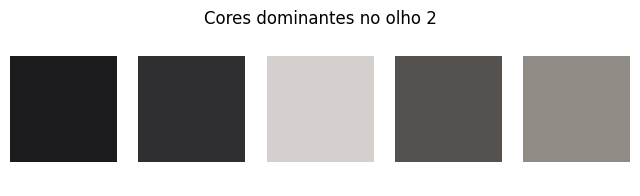

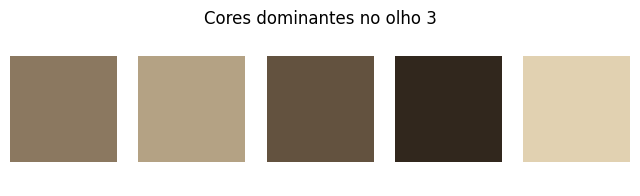

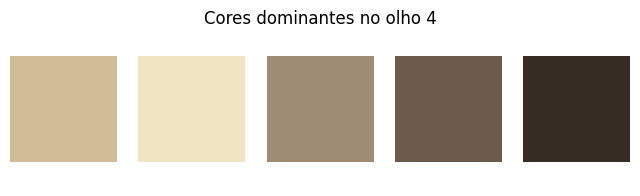

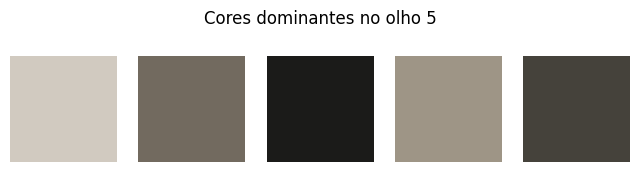

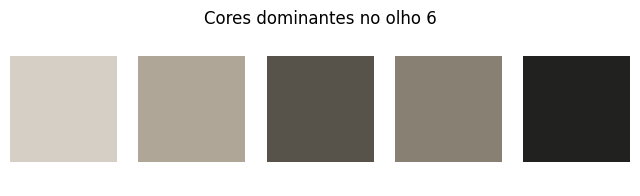

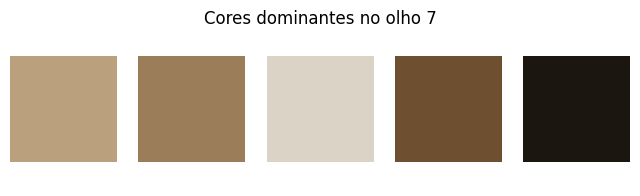

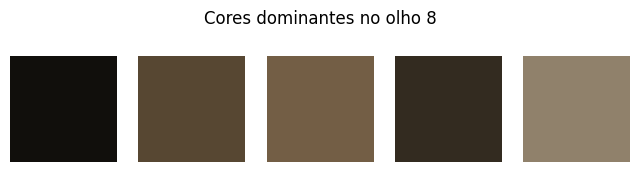

In [533]:
import cv2
from sklearn.cluster import KMeans
import numpy as np

def extract_dominant_colors(image, num_colors=5):
    # Redimensionar a imagem para diminuir o número de pixels e acelerar o processo de clusterização
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)

    # Redefinir a imagem para uma lista de pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    # Converter para float para maior precisão do k-means
    image = np.float32(image)

    # Definir critérios, número de clusters(K) e aplicar kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(image, num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Converter de volta para uint8
    centers = np.uint8(centers)

    # Contar o número de pixels associados a cada cluster
    count_labels = np.bincount(labels.flatten())
    
    # Ordenar os clusters de acordo com o número de pixels e pegar os 'num_colors' mais dominantes
    sorted_idx = np.argsort(count_labels)[::-1][:num_colors]
    dominant_colors = centers[sorted_idx]

    return dominant_colors

# Usar a função para cada recorte de olho
# Suponha que 'cropped_eyes' contém os dois recortes de olho que você já obteve anteriormente

for idx, cropped_eye in enumerate(cropped_eyes, start=1):
    dominant_colors = extract_dominant_colors(cropped_eye, num_colors=5)
    # Mostrar as cores
    plt.figure(figsize=(8, 2))
    plt.title(f"Cores dominantes no olho {idx}")
    plt.axis('off')
    for i, color in enumerate(dominant_colors):
        plt.axis('off')
        plt.subplot(1, 5, i + 1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()

dominant_colors = extract_dominant_colors(cropped_eyes[0], num_colors=5)

In [152]:
len(cropped_eyes)

2

In [555]:
from sklearn.neighbors import KNeighborsClassifier

cropped_eye_zoe = cropped_eyes[2]
cropped_eye_luna = cropped_eyes[0]
cropped_eye_milka = cropped_eyes[4]
cropped_eye_nala = cropped_eyes[7]

# Suponha que você já tenha as cores predominantes para um conjunto de gatos conhecidos
# Por exemplo, para dois gatos, seria algo assim:
zoe_data = extract_dominant_colors(cropped_eye_zoe, num_colors=5).flatten()
luna_data = extract_dominant_colors(cropped_eye_luna, num_colors=5).flatten()
milka_data = extract_dominant_colors(cropped_eye_milka, num_colors=5).flatten()
nala_data = extract_dominant_colors(cropped_eye_nala, num_colors=5).flatten()


# Crie o conjunto de dados de treinamento
# Cada linha representa as cores dominantes de um gato, achatadas em uma única lista
data = np.array([luna_data, zoe_data, milka_data, nala_data])

X_train, X_teste , y_train, y_test = train_test_split(data, np.array(["Luna", "Zoe", "Milka", "Nala"]), test_size=0.25, random_state=42)


# Treine o classificador KNN
knn = KNeighborsClassifier(n_neighbors=2)  # Decrease the number of neighbors to match the number of samples used for training
knn.fit(X_train, y_train)

path_to_new_image = '/Users/bernardozamin/Documents/T1-VisaoComputacional/data/zoe1.jpg'
new_cropped_eye = cv2.imread(path_to_new_image)

# Certifique-se de que a imagem foi carregada corretamente
if new_cropped_eye is not None:
    # Extrair as cores predominantes
    new_eye_colors = extract_dominant_colors(new_cropped_eye, num_colors=5).flatten()

    # O classificador KNN espera múltiplas amostras para fazer a predição,
    # por isso é necessário adicionar uma dimensão extra para criar um array bidimensional
    new_eye_colors = new_eye_colors.reshape(1, -1)

    # Faça a predição usando o classificador KNN
    predicted_label = knn.predict(new_eye_colors)
    print(f"A imagem é identificada como: {predicted_label[0]}")
else:
    print("A imagem do novo olho de gato não foi carregada corretamente.")


A imagem é identificada como: Luna
